In [1]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

In [3]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
    
    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)
    
    L,W,H,C = X_train.shape
    X_train = X_train.reshape(-1, W*H*C)
    X_test = X_test.reshape(-1, W*H*C)
    
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    return (X_train, Y_train), (X_test, Y_test)

In [4]:
from keras import layers, models

In [5]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()
        
        self.add(layers.Dense(Nh_l[0], activation='relu', input_shape = (Nin,) , name='Hidden-1'))
        self.add(layers.Dropout(Pd_l[0]))
        
        self.add(layers.Dense(Nh_l[1], activation='relu', input_shape = (Nin,) , name='Hidden-2'))
        self.add(layers.Dropout(Pd_l[1]))
        
        self.add(layers.Dense(Nout, activation='softmax'))
        
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
%matplotlib inline
%load_ext autoreload 
%autoreload 2
from importlib import reload

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import os

# Graph Tool

In [9]:
import matplotlib

def save_history_history(fname, history_history, fold=''):
    np.save(os.path.join(fold, fname), history_history)


def load_history_history(fname, fold=''):
    history_history = np.load(os.path.join(fold, fname)).item(0)
    return history_history


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)

    
def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()            
    plot_acc(history, '(b) Accracy trajectory')
    plt.show()
    
    
def plot_acc_loss(history):
    plot_acc(history, '(a) Accracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()            

In [10]:
def main():
    Nh_l = [100, 50]
    Pd_l = [0.0 ,0.0]
    number_of_class = 10
    Nout = number_of_class
    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
    history = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_split = 0.2)
    performance_test = model.evaluate(X_test, Y_test, batch_size = 100)
    print('Test Loss and Accuracy -> ', performance_test)
    
    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()

170500096/170498071 [==============================] - 118s 1us/step
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 22s 562us/step - loss: 1.9502 - acc: 0.2962 - val_loss: 1.8515 - val_acc: 0.3447
Epoch 2/10
40000/40000 [==============================] - 6s 141us/step - loss: 1.7713 - acc: 0.3704 - val_loss: 1.7786 - val_acc: 0.3625
Epoch 3/10
40000/40000 [==============================] - 7s 186us/step - loss: 1.7035 - acc: 0.3943 - val_loss: 1.7303 - val_acc: 0.3915
Epoch 4/10
40000/40000 [==============================] - 6s 161us/step - loss: 1.6561 - acc: 0.4123 - val_loss: 1.6804 - val_acc: 0.4052
Epoch 5/10
40000/40000 [==============================] - 6s 147us/step - loss: 1.6058 - acc: 0.4303 - val_loss: 1.6229 - val_acc: 0.4296
Epoch 6/10
40000/40000 [==============================] - 6s 145us/step - loss: 1.5820 - acc: 0.4396 - val_loss: 1.6451 - val_acc: 0.4141
Epoch 7/10
40000/40000 [============================

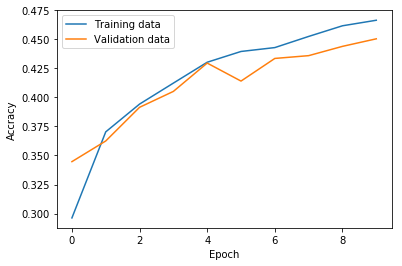

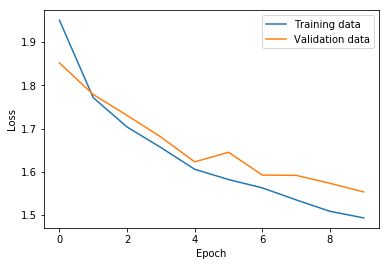

In [11]:
if __name__ == '__main__':
    main()

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

NameError: name 'model' is not defined